In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [4]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [28]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'KMeans_Cluster',
       'Hierarchical_Cluster'],
      dtype='object')

In [23]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
KMeans_Cluster                  0
Hierarchical_Cluster            0
dtype: int64

In [9]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [7]:
df.shape

(210, 7)

# Exploratory Data Analysis 

### 3.1 Correlation Heatmap

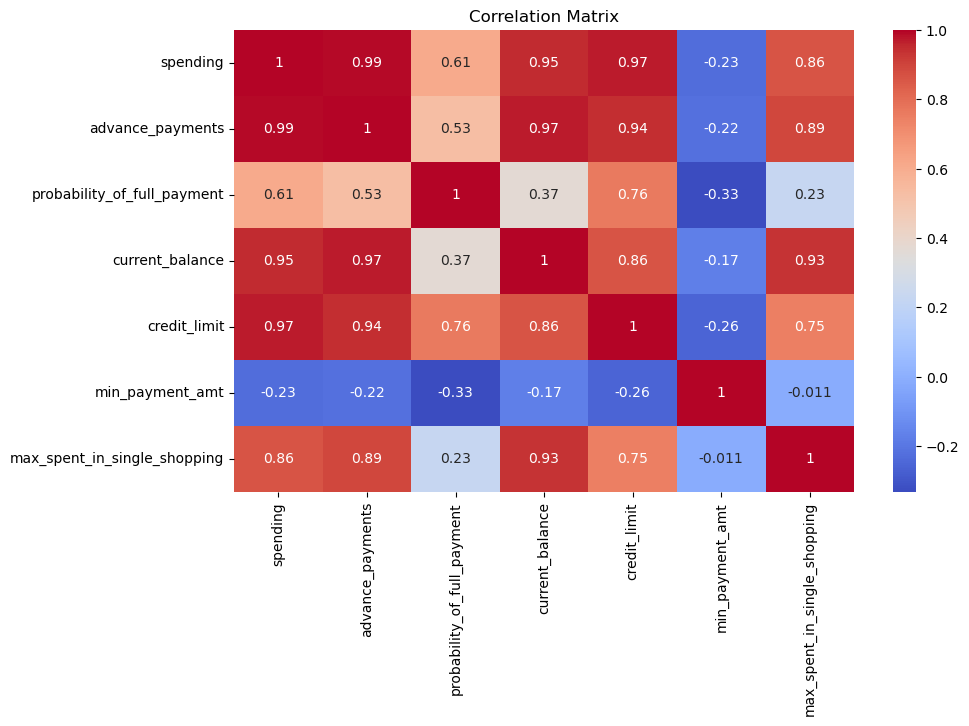

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3.2 Pairplot

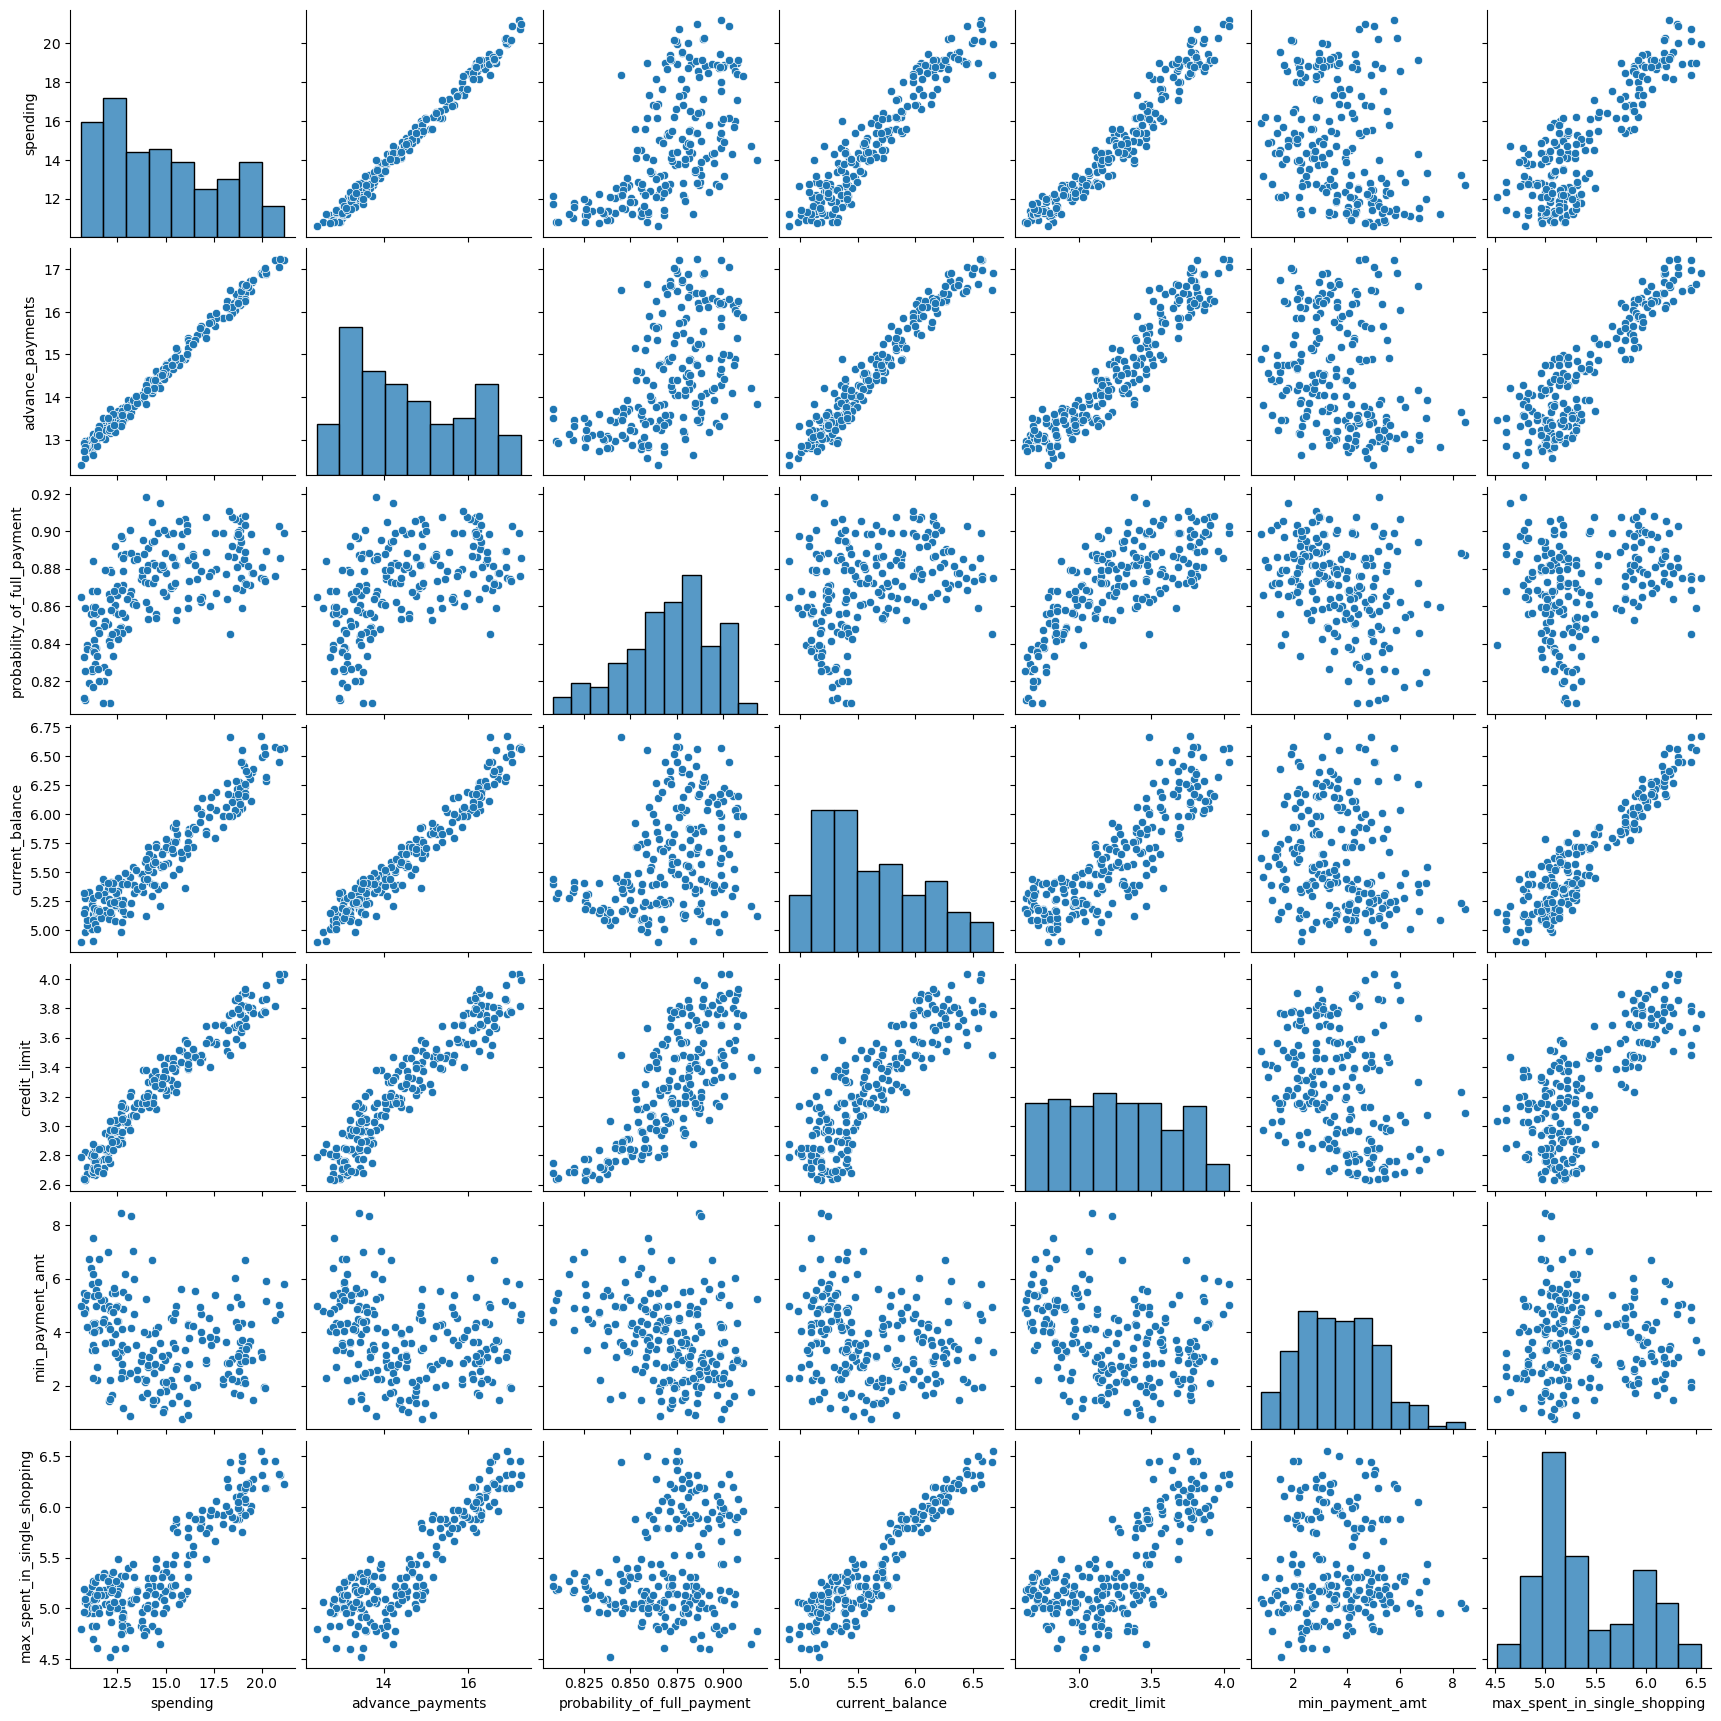

In [11]:
sns.pairplot(df)
plt.show()

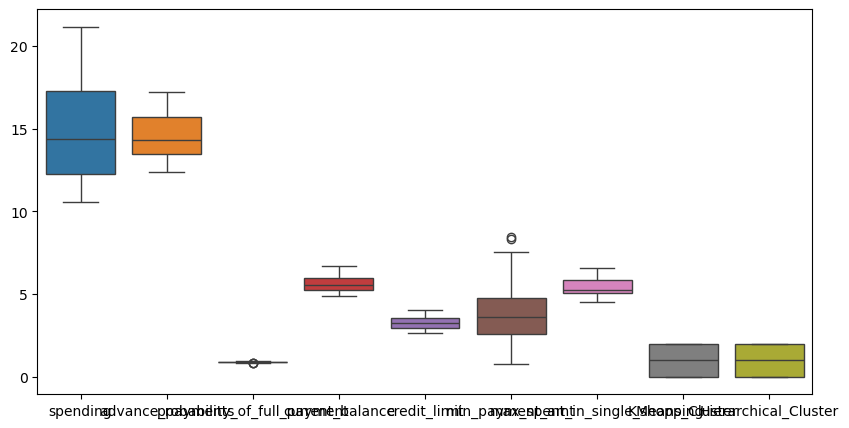

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

# Data Scaling

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

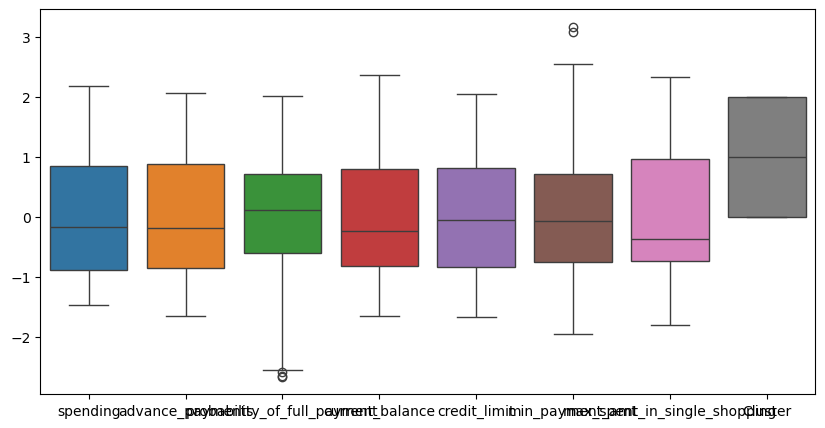

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(scaled_df)
plt.show()

# Hierarchical Clustering

### dendogram

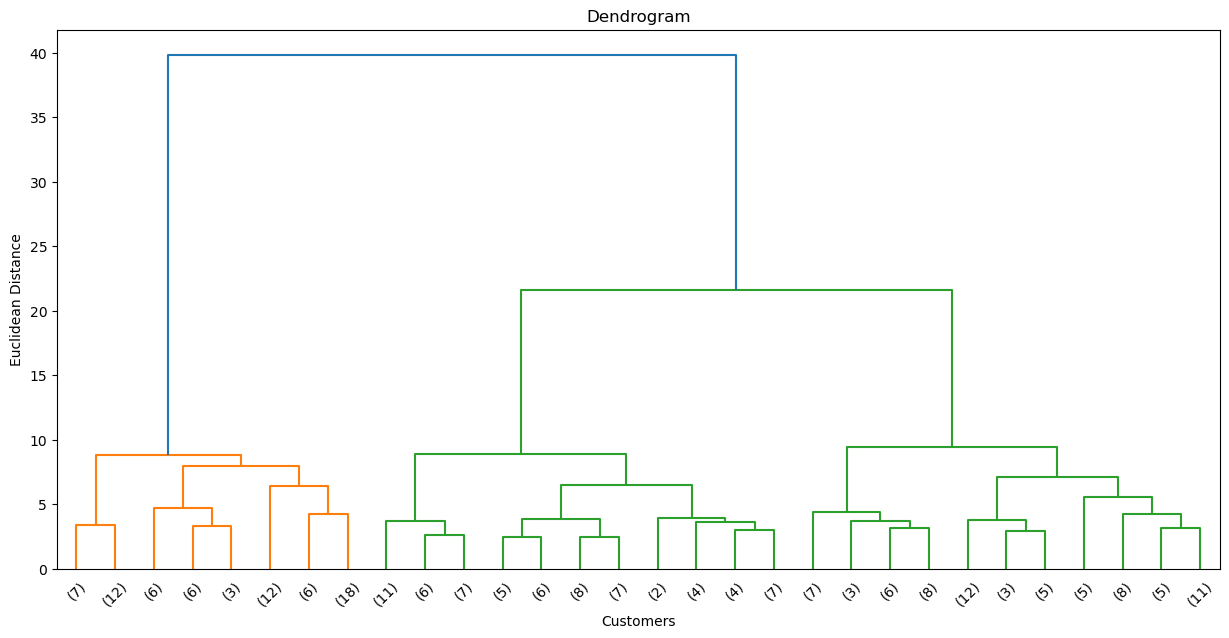

In [13]:
plt.figure(figsize=(15, 7))
linked = linkage(scaled_df, method='ward')
dendrogram(linked, orientation='top', truncate_mode='lastp')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

### Fit Model

   spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  Cluster  
0      1.338579        -0.298806                      2.328998        1  
1      0.858236        -0.242805                     -0.538582        0  
2      1.317348        -0.221471                      1.509107        1  
3     -1.639017         0.987884                     -0.454961        2  
4      1.155464        -1.088154                      0.874813        1  


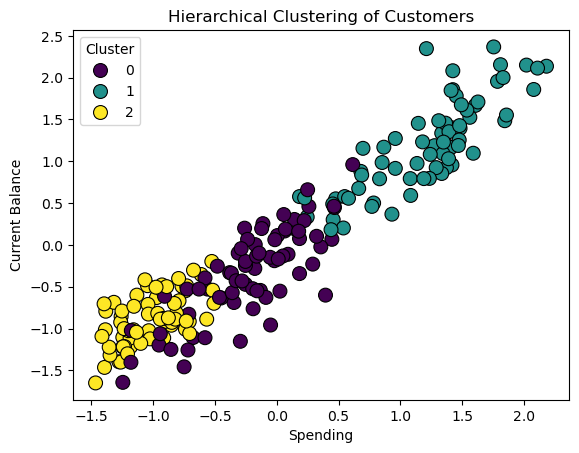

In [16]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df)
scaled_df['Cluster'] = hierarchical_labels
print(scaled_df.head())
sns.scatterplot(data=scaled_df, x='spending', y='current_balance', hue='Cluster', palette='viridis', s=100, marker='o', edgecolor='black')
plt.title("Hierarchical Clustering of Customers")
plt.xlabel("Spending")
plt.ylabel("Current Balance")
plt.legend(title='Cluster')
plt.show()


### K-Means Clustering

 Elbow Method

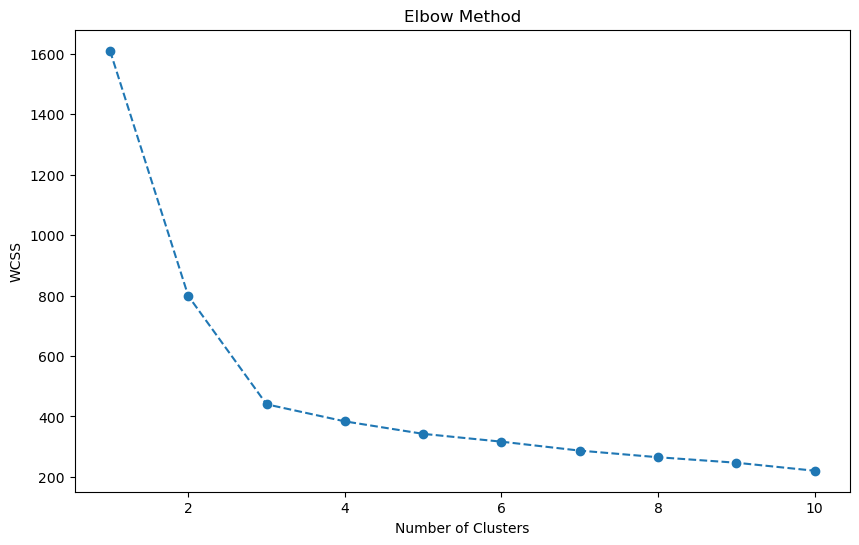

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Silhouette Score

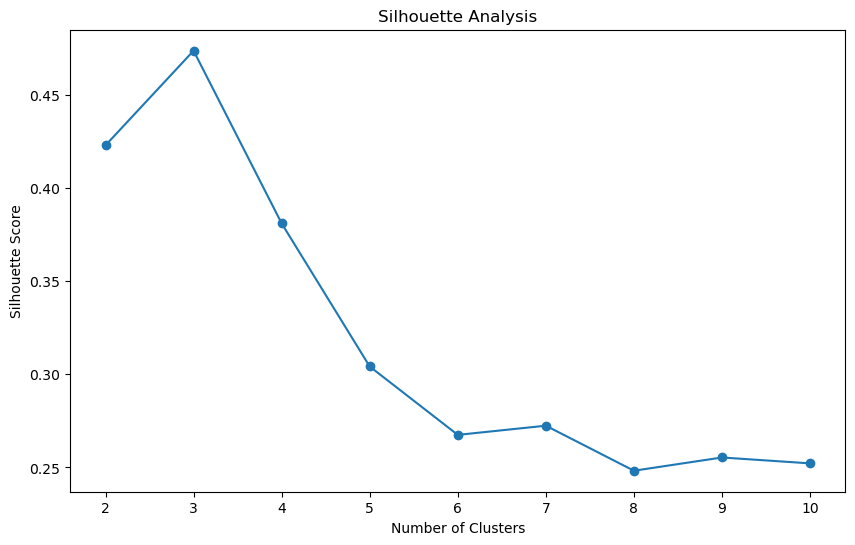

In [18]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    preds = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, preds)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

Final K-Means Model

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Cluster Analysis

Add Labels to Original Data

In [20]:
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels

Cluster Profiles

                 spending  advance_payments  probability_of_full_payment  \
KMeans_Cluster                                                             
0               14.230417         14.242500                     0.880176   
1               11.865882         13.255147                     0.847857   
2               18.378714         16.152000                     0.884039   

                current_balance  credit_limit  min_payment_amt  \
KMeans_Cluster                                                   
0                      5.477653      3.233778         2.620808   
1                      5.238015      2.846632         4.909309   
2                      6.163086      3.684343         3.635871   

                max_spent_in_single_shopping  Hierarchical_Cluster  
KMeans_Cluster                                                      
0                                   5.079514              0.013889  
1                                   5.122353              1.970588  
2           

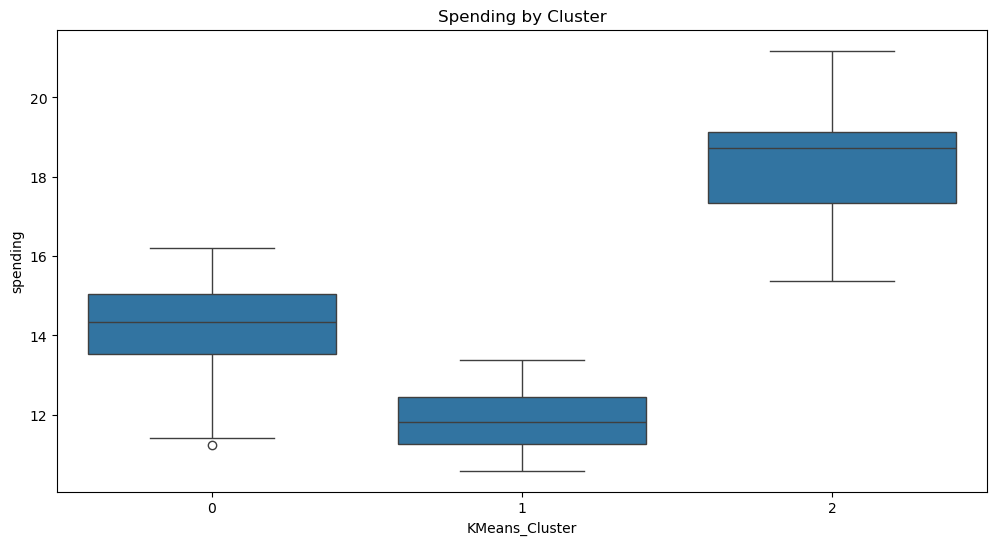

In [21]:
cluster_profile = df.groupby('KMeans_Cluster').mean()
print(cluster_profile)
plt.figure(figsize=(12, 6))
sns.boxplot(x='KMeans_Cluster', y='spending', data=df)
plt.title('Spending by Cluster')
plt.show()

# Business Insights & Recommendations

Cluster 0: Low spending, low credit limit.

Strategy: Offer credit limit increases with low-interest promotions.

Cluster 1: High spending, high balance.

Strategy: Reward loyalty with cashback offers.

Cluster 2: Moderate spending, frequent payments.

Strategy: Introduce installment payment plans.

# Export Results

In [22]:
df.to_csv('clustered_bank_data.csv', index=False)